In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

from sklearn import datasets #open source data analysis library, and the gold standard for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
df_data = pd.read_csv('../data/CensusIncome/adult.data.csv',header=None)
df_data.columns= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
            'capital-gain','capital-loss','hours-per-week','native-country','income']
# df.columns= df.columns.str.strip().str.lower()

df_test = pd.read_csv('../data/CensusIncome/adult.test.csv',header=None,skiprows=1)
df_test.columns= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
            'capital-gain','capital-loss','hours-per-week','native-country','income']
# df_test.columns= df_test.columns.str.strip().str.lower()

#df_2 = df_data.append(df_test)
df_2 = pd.concat([df_data, df_test])

In [4]:
df = df_data
df = df[df['occupation']!=' ?']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
#df['sex int'] = df['sex'].apply(lambda x: 0 if x == 'Female' else 1)
df['sex'] = df['sex'].map({' Male': 0, ' Female': 1})
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
df

# df_2['sex'] = df_2['sex'].map({' Male': 0, ' Female': 1})
df_2['income'] = df_2['income'].map({' <=50K': 0, ' >50K': 1})


C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\3133734604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({' Male': 0, ' Female': 1})
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\3133734604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})


In [6]:
print(df['income'].sum(),df['income'].count(),round(100*(df['income'].sum()/df['income'].count()),1))
print(df_2['income'].sum(),df_2['income'].count(),round(100*(df_2['income'].sum()/df_2['income'].count()),1))

7650 30718 24.9
7841.0 32561 24.1


In [7]:
# One-hot Encoding the Island Feature
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(df[['occupation']])
df[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['race']])
df[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['education']])
df[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['marital-status']])
df[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['workclass']])
df[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['relationship']])
df[one_hot.categories_[0]] = encoded.toarray()

df

C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\1288590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\1288590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\1288590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\1288590.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\1288590.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\1288590.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\1288590.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\1288590.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_6032\1288590.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
df = df.drop(['occupation','race', 'education', 'marital-status','workclass', 'relationship', 'native-country'],axis=1)

In [9]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
       ' Tech-support', ' Transport-moving', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' 10th', ' 11th',
       ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm',
       ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters',
       ' Preschool', ' Prof-school', ' Some-college', ' Divorced',
       ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Widowed', ' Federal-gov',
       ' Local-gov', ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
       ' State-gov', ' Without-pay', ' Husband', ' Not-in-family'

In [10]:
df_rf=df
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     30718 non-null  int64  
 1   fnlwgt                  30718 non-null  int64  
 2   education-num           30718 non-null  int64  
 3   sex                     30718 non-null  int64  
 4   capital-gain            30718 non-null  int64  
 5   capital-loss            30718 non-null  int64  
 6   hours-per-week          30718 non-null  int64  
 7   income                  30718 non-null  int64  
 8    Adm-clerical           30718 non-null  float64
 9    Armed-Forces           30718 non-null  float64
 10   Craft-repair           30718 non-null  float64
 11   Exec-managerial        30718 non-null  float64
 12   Farming-fishing        30718 non-null  float64
 13   Handlers-cleaners      30718 non-null  float64
 14   Machine-op-inspct      30718 non-null

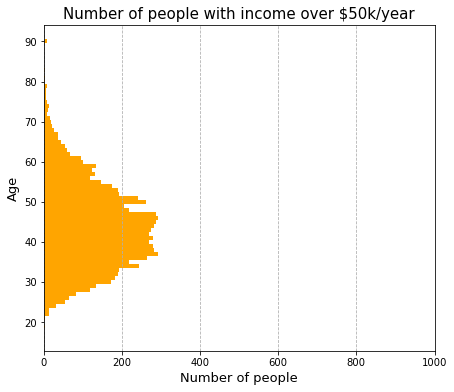

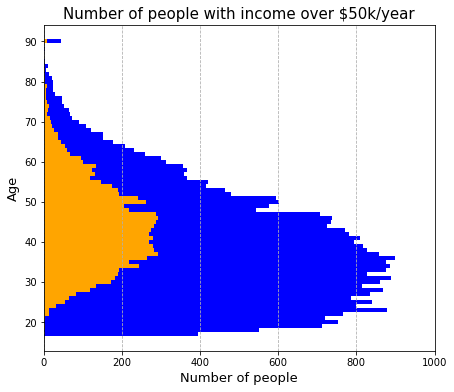

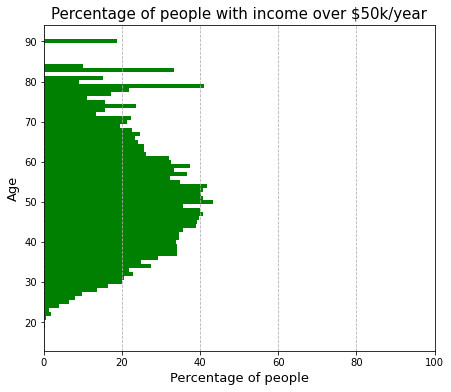

In [12]:
# Histograma per age
parameter='age'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
#fig, ax = plt.subplots(1,2,figsize=(15, 6))

fig = plt.figure(figsize=(7, 6))
plt.barh(soma.index,soma['income'],height=1, color='orange');
plt.xlim([0,1000]);
plt.title('Number of people with income over $50k/year', fontsize=15);
plt.xlabel('Number of people', fontsize=13);
plt.ylabel('Age', fontsize=13);
plt.grid(axis='x', linestyle='--'); #which='major', axis='both'
plt.savefig('../pictures/Age-1.jpg')

fig12 = plt.figure(figsize=(7, 6))
plt.barh(total.index,total['income'],height=1, color='blue');
plt.barh(soma.index,soma['income'],height=1, color='orange');
plt.xlim([0,1000]);
plt.title('Number of people with income over $50k/year', fontsize=15);
plt.xlabel('Number of people', fontsize=13);
plt.ylabel('Age', fontsize=13);
plt.grid(axis='x', linestyle='--');
plt.savefig('../pictures/Age-2.jpg')

fig2 = plt.figure(figsize=(7, 6))
plt.barh(per.index,per['income'],height=1, color='green');
plt.title('Percentage of people with income over $50k/year', fontsize=15);
plt.ylabel('Age', fontsize=13);
plt.xlabel('Percentage of people', fontsize=13);
plt.xlim([0,100]);
plt.grid(axis='x', linestyle='--');
plt.savefig('../pictures/Age-3.jpg')

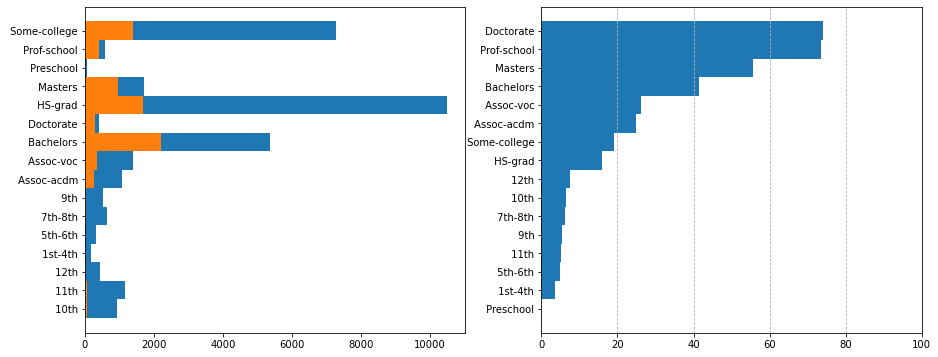

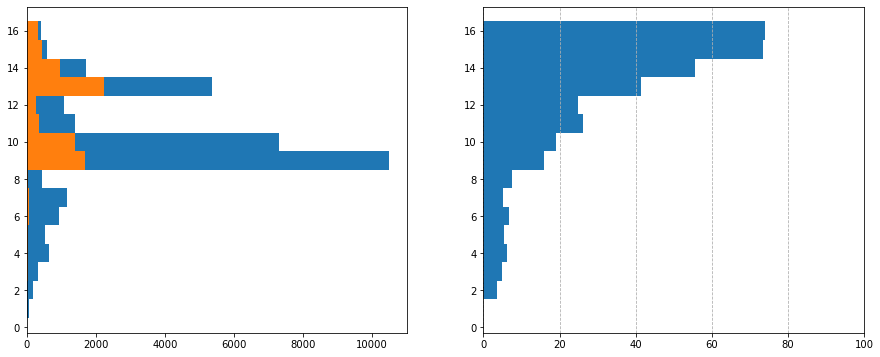

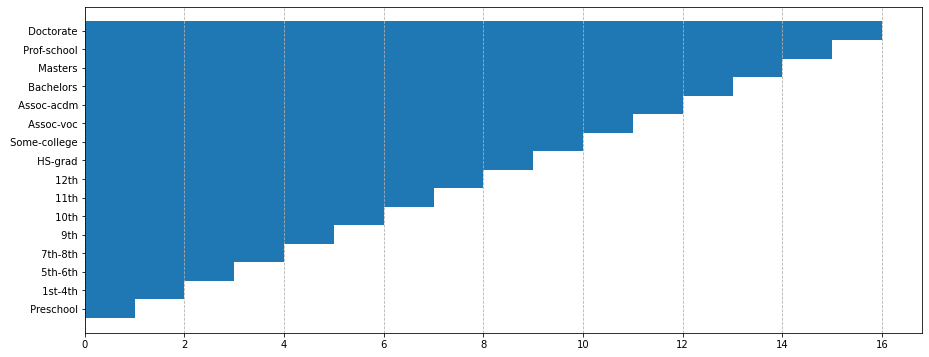

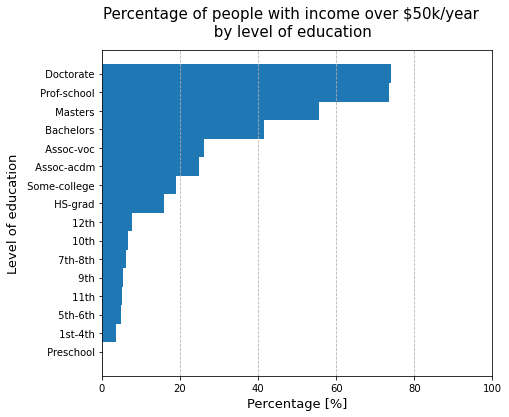

In [32]:
# Histograma per education
parameter='education'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
per1 = per.sort_values('income')
total1 = total.reindex(per.index)
soma1 = soma.reindex(per.index)
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].barh(total1.index,total1['income'],height=1);
ax[0].barh(soma1.index,soma1['income'],height=1);
ax[1].barh(per1.index,per1['income'],height=1);
ax[1].set_xlim([0,100]);
plt.grid(axis='x', linestyle='--');

# Histograma per year of education
parameter='education-num'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].barh(total.index,total['income'],height=1);
ax[0].barh(soma.index,soma['income'],height=1);
ax[1].barh(per.index,per['income'],height=1);
ax[1].set_xlim([0,100]);
plt.grid(axis='x', linestyle='--');


# Histograma education per year of education
parameter='education-num'
total=pd.DataFrame(df_2.groupby('education')['education-num'].mean())
total = total.sort_values('education-num')
fig, ax = plt.subplots(figsize=(15, 6))
ax.barh(total.index,total['education-num'],height=1);
plt.grid(axis='x', linestyle='--');


figE = plt.figure(figsize=(7, 6))
plt.barh(per1.index,per1['income'],height=1);
plt.xlim([0,100]);
plt.grid(axis='x', linestyle='--');
plt.suptitle('Percentage of people with income over $50k/year\n by level of education', fontsize=15);
plt.ylabel('Level of education', fontsize=13);
plt.xlabel('Percentage [%]', fontsize=13);
figE.savefig('../pictures/Education.jpg', bbox_inches='tight');

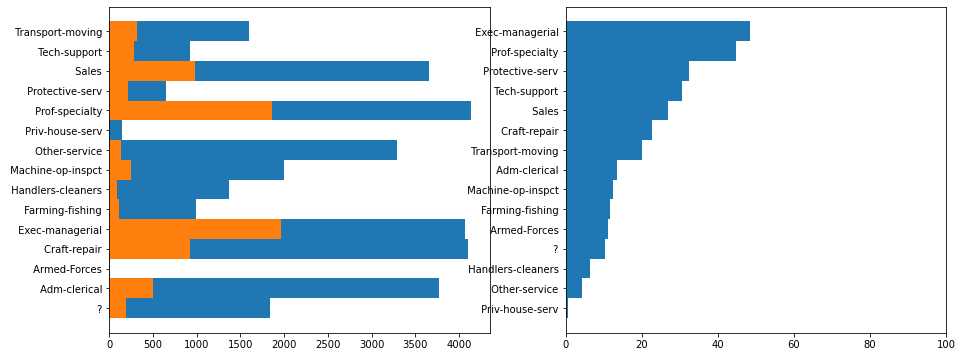

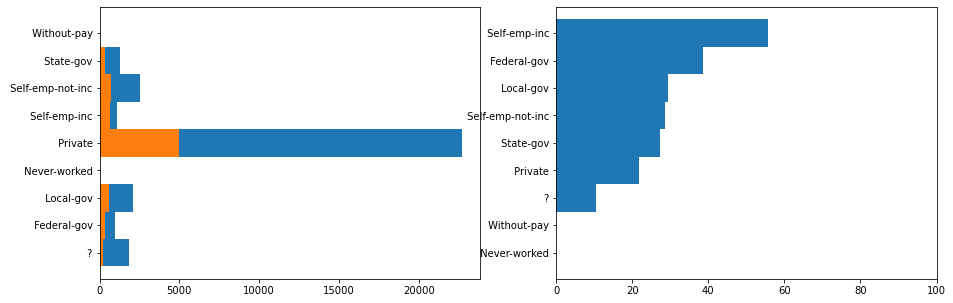

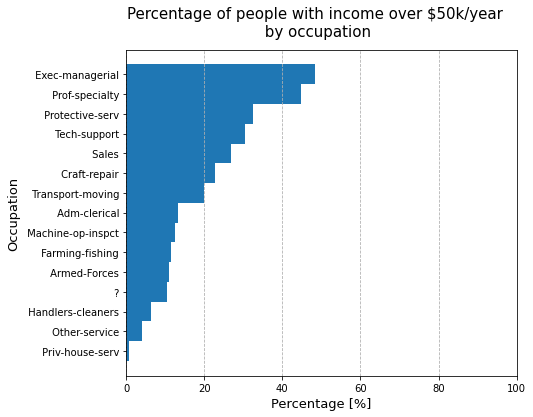

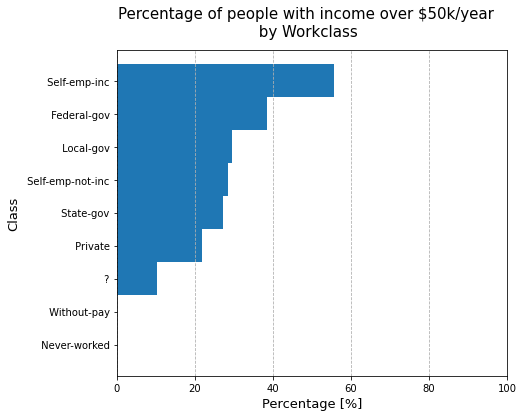

In [42]:
# Histograma by occupation
parameter='occupation'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
per1 = per.sort_values('income')
total1 = total.reindex(per.index)
soma1 = soma.reindex(per.index)
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].barh(total1.index,total1['income'],height=1);
ax[0].barh(soma1.index,soma1['income'],height=1);
ax[1].barh(per1.index,per1['income'],height=1);
ax[1].set_xlim([0,100]);

# Histograma by workclass
parameter='workclass'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
per2 = per.sort_values('income')
total2 = total.reindex(per.index)
soma2 = soma.reindex(per.index)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].barh(total2.index,total2['income'],height=1);
ax[0].barh(soma2.index,soma2['income'],height=1);
ax[1].barh(per2.index,per2['income'],height=1);
ax[1].set_xlim([0,100]);

figO = plt.figure(figsize=(7, 6))
plt.barh(per1.index,per1['income'],height=1);
plt.xlim([0,100]);
plt.grid(axis='x', linestyle='--');
plt.suptitle('Percentage of people with income over $50k/year\n by occupation', fontsize=15);
plt.ylabel('Occupation', fontsize=13);
plt.xlabel('Percentage [%]', fontsize=13);
figO.savefig('../pictures/Occupation.jpg', bbox_inches='tight');

figC = plt.figure(figsize=(7, 6))
plt.barh(per2.index,per2['income'],height=1);
plt.xlim([0,100]);
plt.grid(axis='x', linestyle='--');
plt.suptitle('Percentage of people with income over $50k/year\n by Workclass', fontsize=15);
plt.ylabel('Class', fontsize=13);
plt.xlabel('Percentage [%]', fontsize=13);
figC.savefig('../pictures/WorkClass.jpg', bbox_inches='tight');

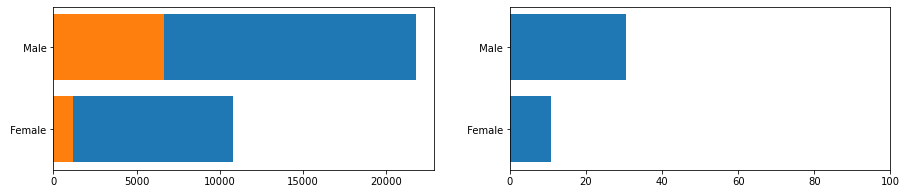

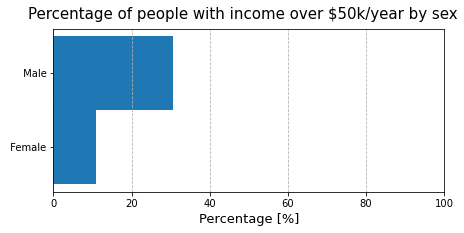

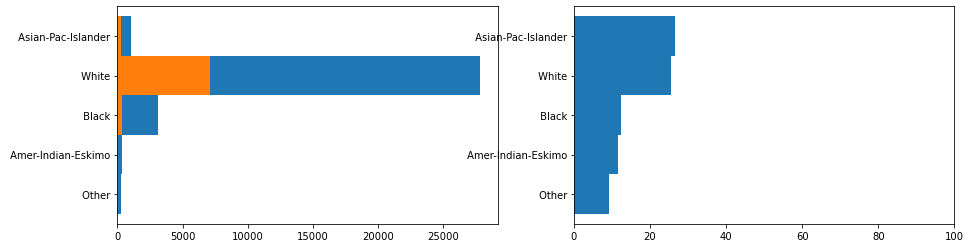

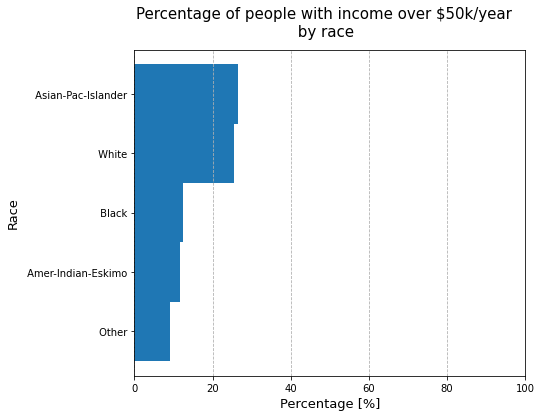

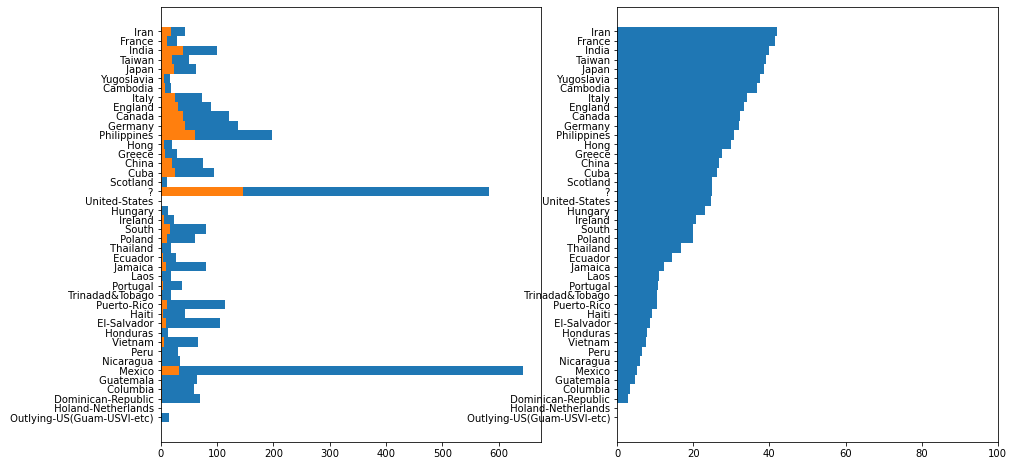

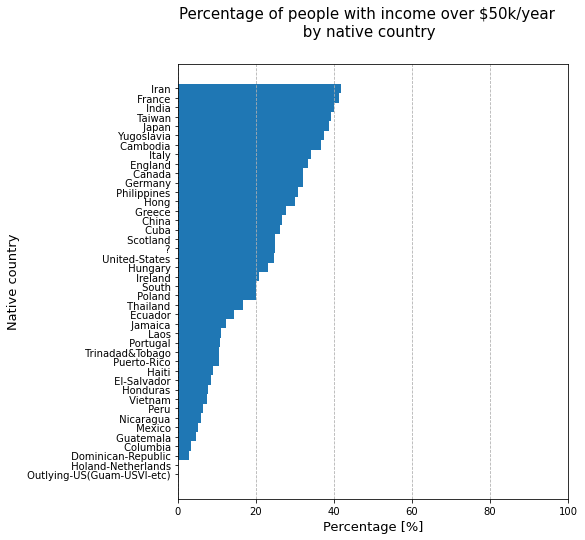

In [50]:
# Histograma per gender
parameter='sex'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
fig, ax = plt.subplots(1,2,figsize=(15, 3))
ax[0].barh(total.index,total['income']);
ax[0].barh(soma.index,soma['income']);
ax[1].barh(per.index,per['income']);
ax[1].set_xlim([0,100]);

figS = plt.figure(figsize=(7, 3))
plt.barh(per.index,per['income'],height=1);
plt.xlim([0,100]);
plt.grid(axis='x', linestyle='--');
plt.suptitle('Percentage of people with income over $50k/year by sex', fontsize=15);
# plt.ylabel('Occupation', fontsize=13);
plt.xlabel('Percentage [%]', fontsize=13);
figS.savefig('../pictures/Sex.jpg', bbox_inches='tight');


# Histograma per race
parameter='race'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
per = per.sort_values('income')
total = total.reindex(per.index)
soma = soma.reindex(per.index)
fig, ax = plt.subplots(1,2,figsize=(15, 4))
ax[0].barh(total.index,total['income'],height=1);
ax[0].barh(soma.index,soma['income'],height=1);
ax[1].barh(per.index,per['income'],height=1);
ax[1].set_xlim([0,100]);

figR = plt.figure(figsize=(7, 6))
plt.barh(per.index,per['income'],height=1);
plt.xlim([0,100]);
plt.grid(axis='x', linestyle='--');
plt.suptitle('Percentage of people with income over $50k/year\n by race', fontsize=15);
plt.ylabel('Race', fontsize=13);
plt.xlabel('Percentage [%]', fontsize=13);
figR.savefig('../pictures/Race.jpg', bbox_inches='tight');


# Histograma per country
parameter='native-country'
total=pd.DataFrame(df_2[df_2['native-country']!=' United-States'].groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2[df_2['native-country']!=' United-States'].groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
per = per.sort_values('income')
total = total.reindex(per.index)
soma = soma.reindex(per.index)
fig, ax = plt.subplots(1,2,figsize=(15, 8))
ax[0].barh(total.index,total['income'],height=1);
ax[0].barh(soma.index,soma['income'],height=1);
ax[1].barh(per.index,per['income'],height=1);
ax[1].set_xlim([0,100]);

figCO = plt.figure(figsize=(7, 8))
plt.barh(per.index,per['income'],height=1);
plt.xlim([0,100]);
plt.grid(axis='x', linestyle='--');
plt.suptitle('Percentage of people with income over $50k/year\n by native country', fontsize=15);
plt.ylabel('Native country', fontsize=13);
plt.xlabel('Percentage [%]', fontsize=13);
figCO.savefig('../pictures/Country.jpg', bbox_inches='tight');


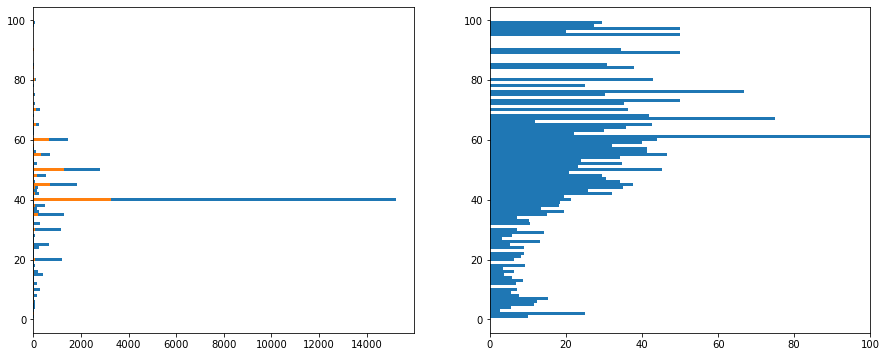

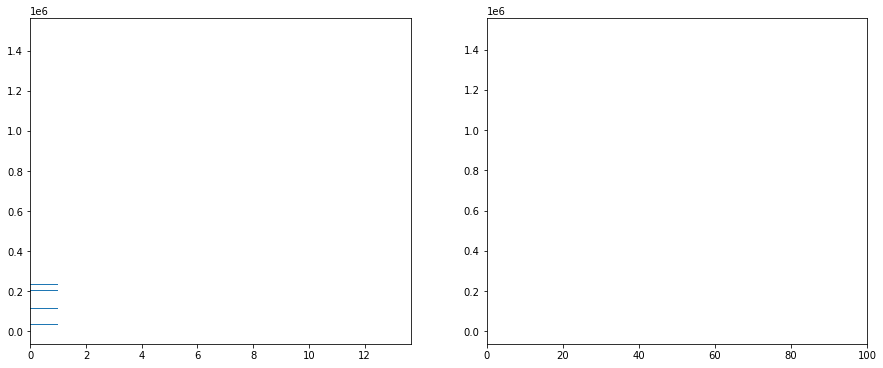

In [133]:
# Histograma per hours-per-week
parameter='hours-per-week'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].barh(total.index,total['income'],height=1);
ax[0].barh(soma.index,soma['income'],height=1);
ax[1].barh(per.index,per['income'],height=1);
ax[1].set_xlim([0,100]);

# Histograma per final weight
parameter='fnlwgt'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].barh(total.index,total['income'],height=1);
ax[0].barh(soma.index,soma['income'],height=1);
ax[1].barh(per.index,per['income'],height=1);
ax[1].set_xlim([0,100]);

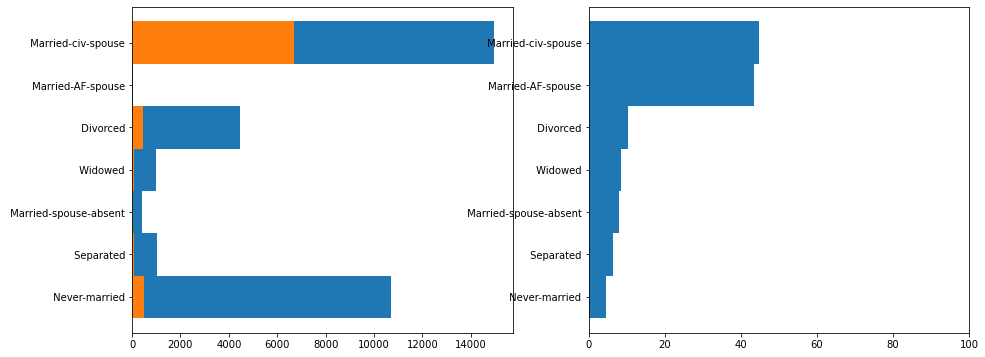

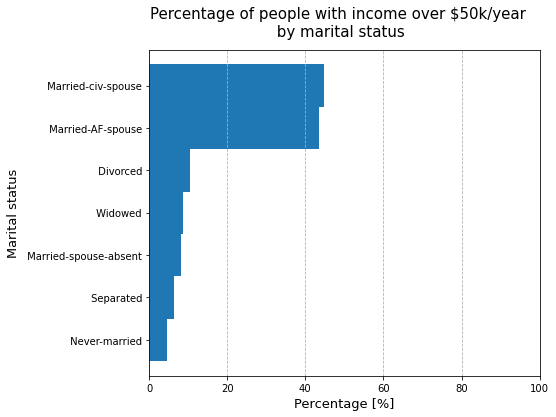

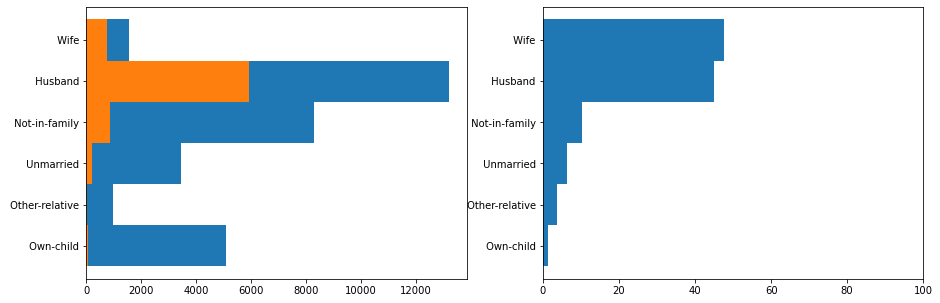

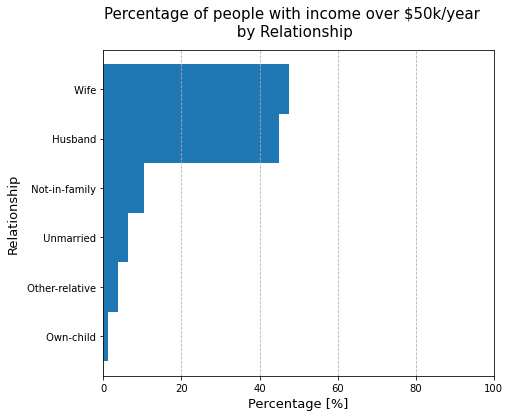

In [44]:
# Histograma by marital-status
parameter='marital-status'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
per = per.sort_values('income')
total = total.reindex(per.index)
soma = soma.reindex(per.index)
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].barh(total.index,total['income'],height=1);
ax[0].barh(soma.index,soma['income'],height=1);
ax[1].barh(per.index,per['income'],height=1);
ax[1].set_xlim([0,100]);

figMS = plt.figure(figsize=(7, 6))
plt.barh(per.index,per['income'],height=1);
plt.xlim([0,100]);
plt.grid(axis='x', linestyle='--');
plt.suptitle('Percentage of people with income over $50k/year\n by marital status', fontsize=15);
plt.ylabel('Marital status', fontsize=13);
plt.xlabel('Percentage [%]', fontsize=13);
figMS.savefig('../pictures/Marital_status.jpg', bbox_inches='tight');


# Histograma by relationship
parameter='relationship'
total=pd.DataFrame(df_2.groupby(parameter)['income'].count())
soma=pd.DataFrame(df_2.groupby(parameter)['income'].sum())
per = pd.DataFrame(round(100*df_2.groupby(parameter)['income'].sum()/df_2.groupby(parameter)['income'].count(),1))
per = per.sort_values('income')
total = total.reindex(per.index)
soma = soma.reindex(per.index)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].barh(total.index,total['income'],height=1);
ax[0].barh(soma.index,soma['income'],height=1);
ax[1].barh(per.index,per['income'],height=1);
ax[1].set_xlim([0,100]);

figRs = plt.figure(figsize=(7, 6))
plt.barh(per.index,per['income'],height=1);
plt.xlim([0,100]);
plt.grid(axis='x', linestyle='--');
plt.suptitle('Percentage of people with income over $50k/year\n by Relationship', fontsize=15);
plt.ylabel('Relationship', fontsize=13);
plt.xlabel('Percentage [%]', fontsize=13);
figRs.savefig('../pictures/Relationship.jpg', bbox_inches='tight');

In [609]:
# Get numerical feature importances
importances = list(model_train.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: fnlwgt               Importance: 0.17
Variable: age                  Importance: 0.15
Variable: capital-gain         Importance: 0.1
Variable: hours-per-week       Importance: 0.08
Variable: education-num        Importance: 0.07
Variable:  Married-civ-spouse  Importance: 0.07
Variable:  Husband             Importance: 0.05
Variable: capital-loss         Importance: 0.03
Variable:  Exec-managerial     Importance: 0.02
Variable:  Prof-specialty      Importance: 0.02
Variable:  Never-married       Importance: 0.02
Variable: sex                  Importance: 0.01
Variable:  Adm-clerical        Importance: 0.01
Variable:  Craft-repair        Importance: 0.01
Variable:  Other-service       Importance: 0.01
Variable:  Sales               Importance: 0.01
Variable:  Tech-support        Importance: 0.01
Variable:  Transport-moving    Importance: 0.01
Variable:  Black               Importance: 0.01
Variable:  White               Importance: 0.01
Variable:  Bachelors           Importance

In [610]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, train_features, train_labels, n_repeats=30, random_state=42)#
for i in r.importances_mean.argsort()[::-1]:
#    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
               print('Measured with permutation:',
               (f"{feature_list[i]:24}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}"),)

    
importancesn = (list(feature_list))
b = list(r.importances_mean)
plt.style.use('ggplot')
x_values = list(range(len(importancesn)))
# plt.bar(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
#        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
#        'num_keywords', 'data_channel_is_lifestyle',
#        'data_channel_is_entertainment', 'data_channel_is_bus',
#        'data_channel_is_socmed', 'data_channel_is_tech',
#        'data_channel_is_world', 'self_reference_avg_sharess', 'is_weekend',
#        'lda_00', 'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
#        'global_sentiment_polarity', 'global_rate_positive_words',
#        'global_rate_negative_words', 'rate_positive_words',
#        'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
#        'max_positive_polarity', 'avg_negative_polarity',
#        'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
#        'title_sentiment_polarity', 'abs_title_subjectivity',
#        'abs_title_sentiment_polarity'],sorted(b), orientation = 'vertical', color = 'darkblue', facecolor=None) #['acylic trivalent nodes', '6-rings', 'MWT', 'non-cyclic nitrogen','acylic divalent nodes', '5-rings', 'cylic nitrogen', 'logP', 'H-bond donor', 'rotatable bonds', 'H-bond acceptor', 'cyclic trivalent nodes','molar refractivity','TPSA'], 
# plt.xticks(x_values, rotation='vertical')
# plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature importances measured with permutation')
#plt.savefig('C:/Users/sky98/OneDrive/Dokumente/Uni - Chemie/Sarah/Masterarbeit/Unisyscat retreat/Permutation Features', bbox_inches='tight')
# plt.show()


Measured with permutation: age                     0.104 +/- 0.001
Measured with permutation: fnlwgt                  0.075 +/- 0.001
Measured with permutation: hours-per-week          0.075 +/- 0.001
Measured with permutation:  Married-civ-spouse     0.055 +/- 0.001
Measured with permutation: capital-gain            0.052 +/- 0.001
Measured with permutation: education-num           0.046 +/- 0.001
Measured with permutation:  Husband                0.031 +/- 0.001
Measured with permutation:  Exec-managerial        0.029 +/- 0.001
Measured with permutation:  HS-grad                0.022 +/- 0.001
Measured with permutation:  Private                0.020 +/- 0.001
Measured with permutation:  Prof-specialty         0.018 +/- 0.000
Measured with permutation:  Bachelors              0.016 +/- 0.000
Measured with permutation: capital-loss            0.016 +/- 0.001
Measured with permutation:  Craft-repair           0.014 +/- 0.000
Measured with permutation:  Some-college           0.013 +/- 0